# requirements:
numpy, pandas, nltk, scikit-learn, matplotlib, seaborn 

### Download 20news groups

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
groups = fetch_20newsgroups()

In [3]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
import numpy as np
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [5]:
# visualize target
import seaborn as sns
sns.distplot(groups.target)
import matplotlib.pyplot as plt
plt.show()

<Figure size 640x480 with 1 Axes>

### Preprocessing Data

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def letters_only(astr):
    for c in astr:
        if not c.isalpha():
            return False

    return True


cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()


for post in groups.data:
    cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())
                             for word in post.split()
                             if letters_only(word)
                             and word not in all_names]))

    
transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

### Data Clustering

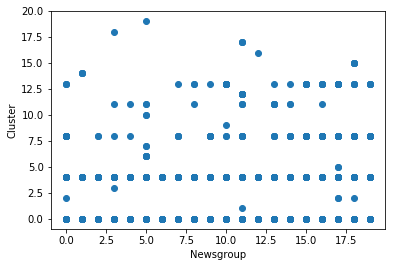

In [7]:
km = KMeans(n_clusters=20)
km.fit(transformed)
labels = groups.target
plt.scatter(labels, km.labels_)
plt.xlabel('Newsgroup')
plt.ylabel('Cluster')
plt.show()

### Topic modeling

In [8]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, random_state=43).fit(transformed)

for topic_idx, topic in enumerate(nmf.components_):
    label = '{}: '.format(topic_idx)
    print(label, " ".join([cv.get_feature_names()[i]
                           for i in topic.argsort()[:-9:-1]]))

0:  wa thought later took left order seen taken
1:  db bit data place stuff add time line
2:  server using display screen support code mouse application
3:  file section information write source change entry number
4:  disk drive hard controller support card board head
5:  entry rule program source number info email build
6:  new york sale change service result study early
7:  image software user package using display include support
8:  window manager application using offer user information course
9:  gun united control house american second national issue
10:  hockey league team game division player list san
11:  turkish government sent war study came american world
12:  program change technology display information version application rate
13:  space nasa technology service national international small communication
14:  government political federal sure free private local country
15:  output line open write read return build section
16:  people country doing tell live killed lot s